<a href="https://colab.research.google.com/github/sydoky/Instagram-Reach-Analysis/blob/main/Instagram_Reach_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data=pd.read_csv("/content/Instagram data.csv",encoding="latin1")
data

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [2]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [3]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

# **Now Let's start with analyzing the reach of my Instagram posts.**

# Let's have a look at the distribution of impressions recieved from home

From Home means from homepage

In [4]:
data

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


<ipython-input-5-7191341cef0e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["From Home"])


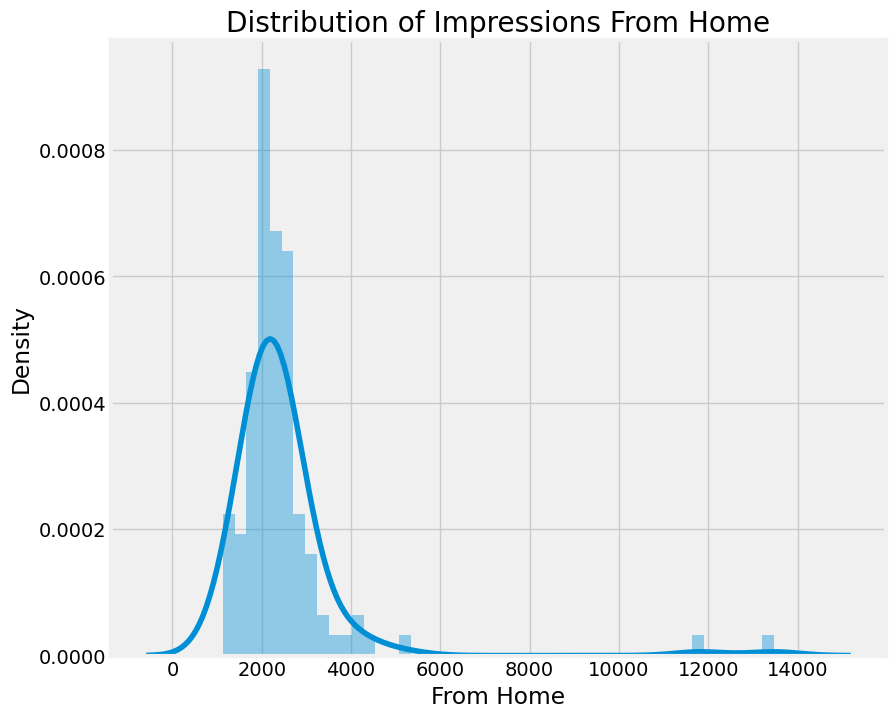

In [5]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of Impressions From Home")
sns.distplot(data["From Home"])
plt.show()

# **Let's have a look at the distribution of impressions recieved from hashtags**

<ipython-input-6-58468ba01a12>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["From Hashtags"])


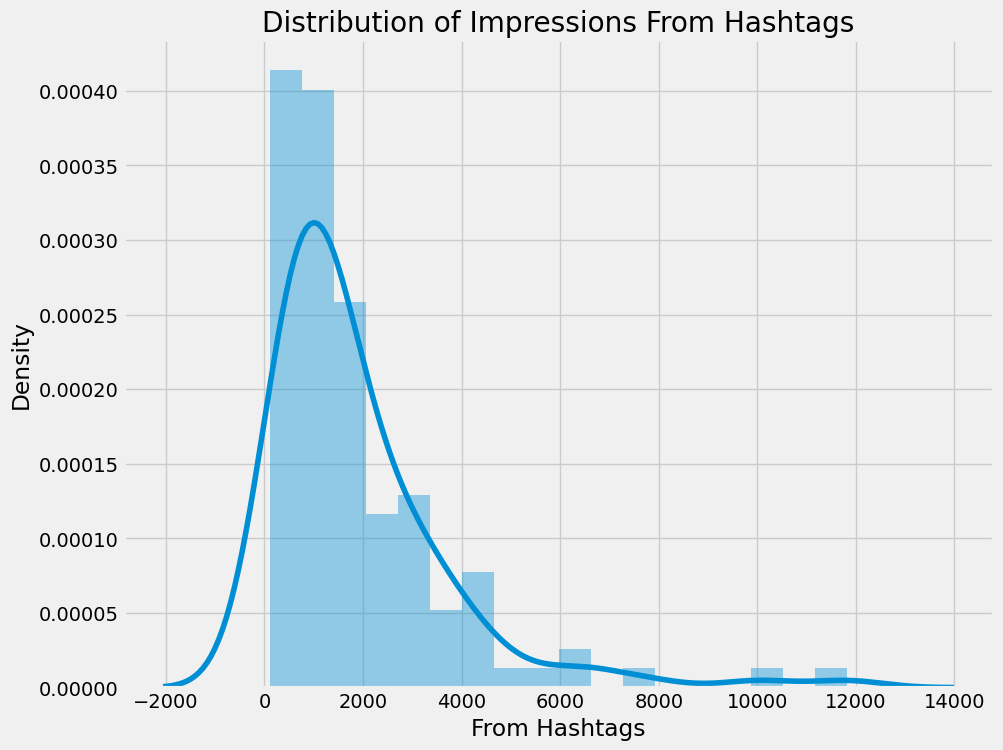

In [6]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data["From Hashtags"])
plt.show()

# **Let's have a look at the distribution of impressions recieved from Explore**

Explore is an Instagram recommedation system

<ipython-input-7-c092553f5667>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["From Explore"])


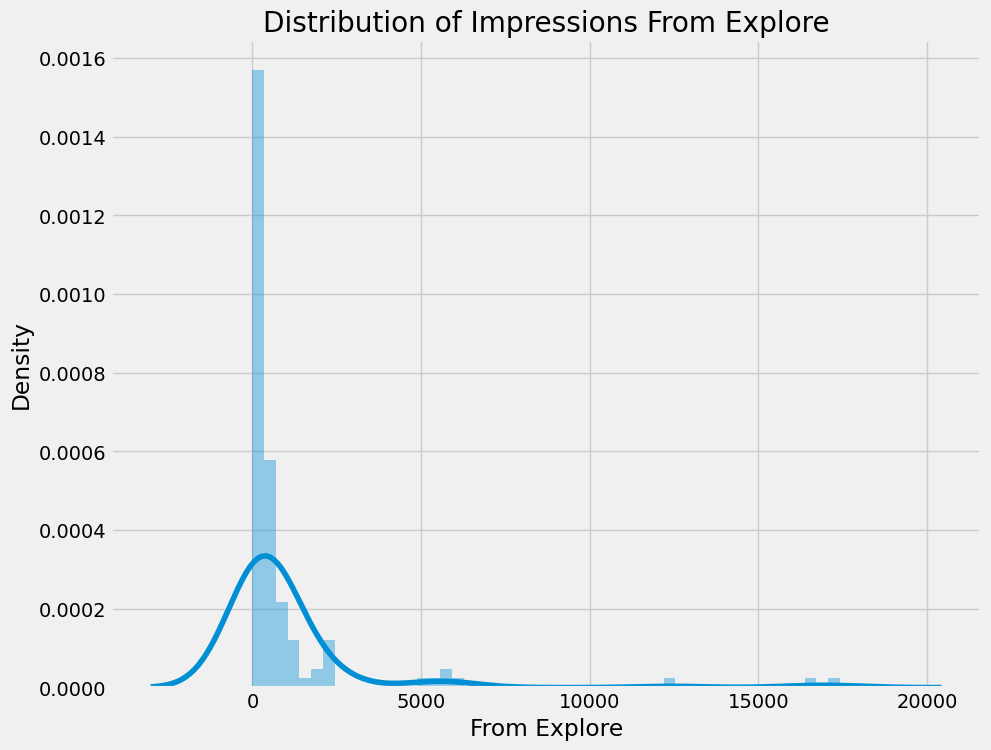

In [7]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of Impressions From Explore")
sns.distplot(data["From Explore"])
plt.show()

Above Instagram is not recommending our page

# **Let's have a look at the distribution of impressions recieved From Other**

<ipython-input-8-fc9df8d94f99>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["From Other"])


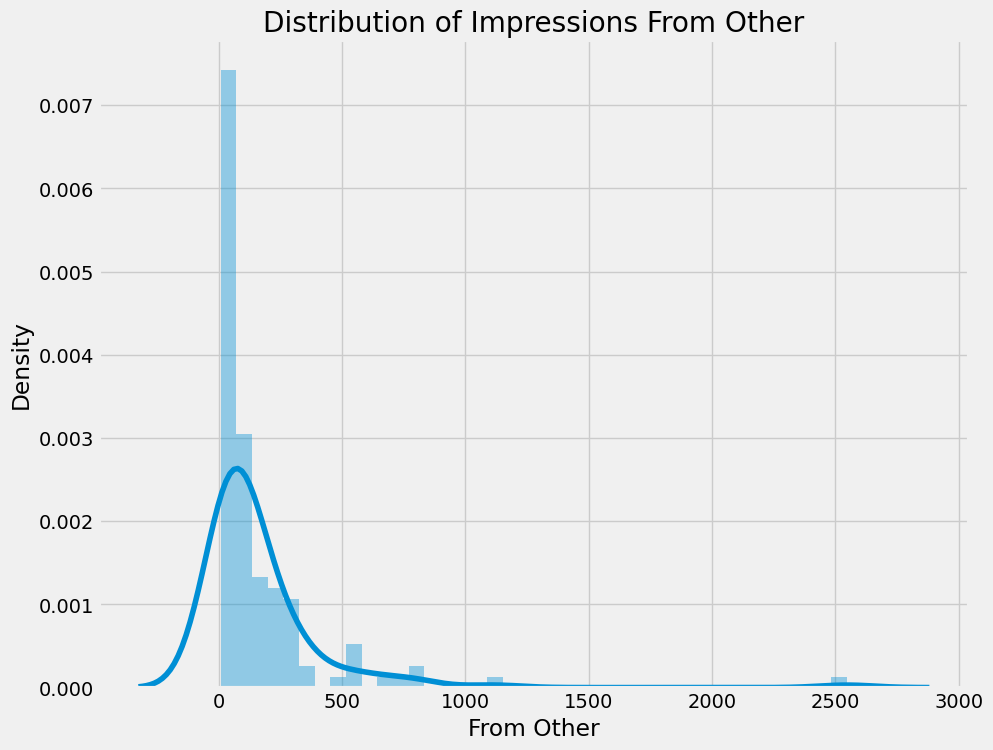

In [8]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of Impressions From Other")
sns.distplot(data["From Other"])
plt.show()

# **Let's have a look at the percentage of impressions from various sources on Instagram**

In [9]:
home=data["From Home"].sum()
hashtags=data["From Hashtags"].sum()
explore=data["From Explore"].sum()
other=data["From Other"].sum()

labels=["From Home","From Hashtags","From Explore","From Other"]
values=[home,hashtags,explore,other]

fig=px.pie(data,values=values,names=labels,title="Impressions on Instagram Posts From Various Sources",hole=0.5)
fig.show()

In [10]:
data

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


# **Let's Analyze the content of my Instagram Posts**

## **Let's Create a wordcloud of the caption column to to look at the most used words in the caption: **

In [11]:
name="My name is Misha"

a=name.split(" ")
a


['My', 'name', 'is', 'Misha']

In [12]:
a=["My","name", "is", "Misha"]
b=" "

print(b.join(a))

My name is Misha


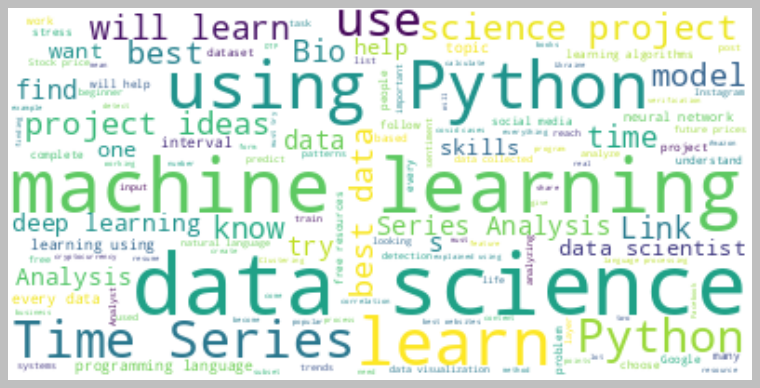

In [13]:
text=" ".join(i for i in data.Caption)
stopwords=set(STOPWORDS)
worldcloud=WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.style.use("classic")
plt.figure(figsize=(12,10))
plt.imshow(worldcloud,interpolation="bilinear")
plt.axis("off")
plt.show()
#the bigger words = most used

# **Most used hashtag words below**

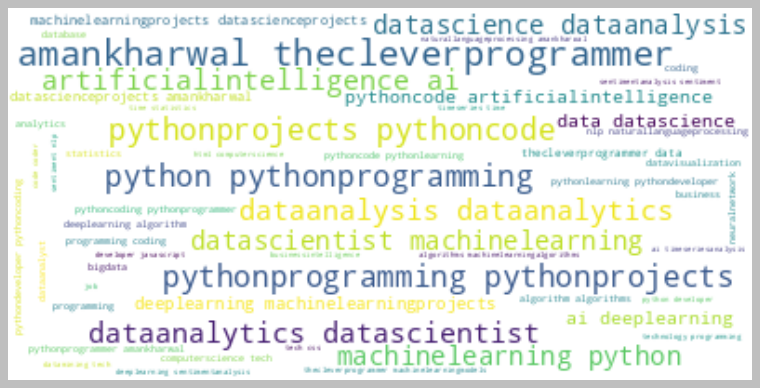

In [14]:
text=" ".join(i for i in data.Hashtags)
stopwords=set(STOPWORDS)
worldcloud=WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.style.use("classic")
plt.figure(figsize=(12,10))
plt.imshow(worldcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# **Let's analyze relatoinships to find the most important factors of our Instagram reach. It will help us in understanding how the Instagram Algorithm works.**

# **Let's have alook at the Relationship between the number of likes and the impressions on Instagram post:**

In [15]:
figure=px.scatter(data_frame=data,x="Impressions",y="Likes",size="Likes",trendline="ols",title="Relationship Between Likes and Impressions")
figure.show()

# **There is a linear relationship between likes and impressions. The more likes you get the more impression you will make.**
# **Above graph for this comment**

# **Let's have a look at the Relationship between the number of comments and the impressions on Instagram post:**

In [16]:
figure=px.scatter(data_frame=data,x="Impressions",y="Comments",size="Comments",trendline="ols",title="Relationship Between Comments and Impressions")
figure.show()

# **Comments do not affect the impressions, the graph above**

# **Let's have a look at the Relationship between the number of shares and the impressions on Instagram post:**

In [19]:
figure=px.scatter(data_frame=data,x="Impressions",y="Shares",size="Shares",trendline="ols",title="Relationship Between Shares and Impressions")
figure.show()

# **Let's have a look at the Relationship between the number of saves and the impressions on Instagram post:**

In [23]:
figure=px.scatter(data_frame=data,x="Impressions",y="Saves",size="Saves",trendline="ols",title="Relationship Between Saves and Impressions")
figure.show()

In [24]:
data

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


# Now let's have a look at the correlation all of the columns with the Impression columns: 

In [26]:
correlation=data.corr()

correlation

<ipython-input-26-887be5ad79a4>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
Impressions,1.000000,0.844698,0.560760,0.893607,0.592960,0.779231,-0.028524,0.634675,0.849835,0.760981,0.889363
From Home,0.844698,1.000000,0.177516,0.800573,0.555666,0.768817,0.012716,0.674985,0.698330,0.531076,0.672675
From Hashtags,0.560760,0.177516,1.000000,0.190453,0.229623,0.305929,0.161439,0.219511,0.662124,0.691345,0.555485
From Explore,0.893607,0.800573,0.190453,1.000000,0.495685,0.747803,-0.158565,0.615731,0.653699,0.531850,0.796019
From Other,0.592960,0.555666,0.229623,0.495685,1.000000,0.331907,-0.108703,0.156834,0.393510,0.633080,0.546737
Saves,0.779231,0.768817,0.305929,0.747803,0.331907,1.000000,-0.026912,0.860324,0.845643,0.360628,0.628461
Comments,-0.028524,0.012716,0.161439,-0.158565,-0.108703,-0.026912,1.000000,0.016933,0.123586,0.096714,-0.060631
Shares,0.634675,0.674985,0.219511,0.615731,0.156834,0.860324,0.016933,1.000000,0.707794,0.245361,0.493070
Likes,0.849835,0.698330,0.662124,0.653699,0.393510,0.845643,0.123586,0.707794,1.000000,0.626107,0.746333
Profile Visits,0.760981,0.531076,0.691345,0.531850,0.633080,0.360628,0.096714,0.245361,0.626107,1.000000,0.853152


In [27]:
correlation["Impressions"].sort_values(ascending=False)

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

In [28]:
correlation["Comments"].sort_values(ascending=False)

Comments          1.000000
From Hashtags     0.161439
Likes             0.123586
Profile Visits    0.096714
Shares            0.016933
From Home         0.012716
Saves            -0.026912
Impressions      -0.028524
Follows          -0.060631
From Other       -0.108703
From Explore     -0.158565
Name: Comments, dtype: float64

Conversion Rate:
How many followers are getting from the profile visit from a post.

In [30]:
conversion_rate=(data["Follows"].sum()/data["Profile Visits"].sum())*100
conversion_rate
#from 100 visits you will get 41 people to follow you output results

41.00265604249668

In [31]:
figure=px.scatter(data_frame=data,x="Profile Visits",y="Follows",size="Follows",trendline="ols",title="Relationship Between Profile Visits and Follows")
figure.show()

# **Let's predict the reach of an Intagram post:**

In [32]:
data

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


Our target is the impressions

In [34]:
x=np.array(data[["Likes","Saves","Comments","Shares","Profile Visits","Follows"]])

y=np.array(data["Impressions"])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#x is the feature

In [35]:
model=PassiveAggressiveRegressor()
model.fit(x_train,y_train)

PassiveAggressiveRegressor()

In [36]:
model.score(x_test,y_test)

0.8379427549402251

# **Predict:**

In [37]:
#x=np.array(data[["Likes","Saves","Comments","Shares","Profile Visits","Follows"]])

In [42]:
features=np.array([[40,2,3,1,50,2]])

In [43]:
model.predict(features)
#output is the number of impressions

array([2169.66281694])